In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


#### Part I

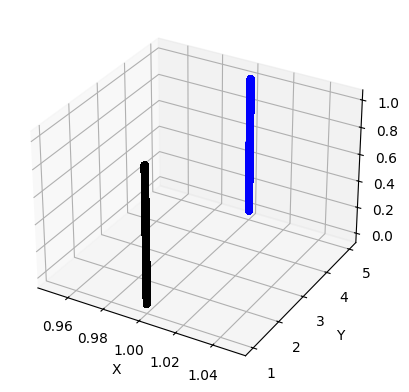

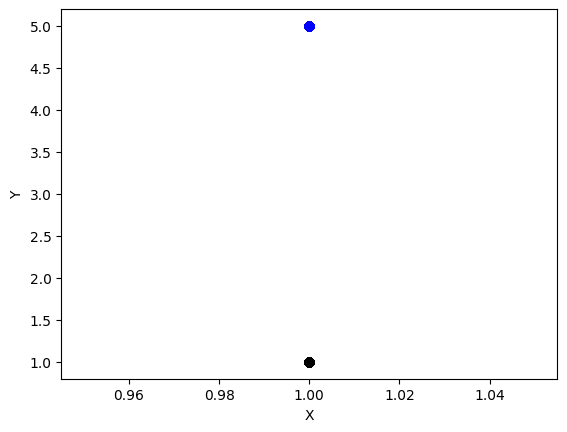

In [9]:
## Load points

with open('points.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

blue_points = loaded_data['blue_points']
black_points = loaded_data['black_points']

# Plot points as a 3d point
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(blue_points[:, 0], blue_points[:, 1], blue_points[:, 2], c='blue', marker='o')
ax.scatter(black_points[:, 0], black_points[:, 1], black_points[:, 2], c='black', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

#Plot points as 2d points
plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', marker='o')
plt.scatter(black_points[:, 0], black_points[:, 1], c='black', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [12]:
## Follow image formation steps and complete this section as in the writeup

# Step 1 - define the parameters and the equation that you will use

# Define parameters of the camera and image plane
camera_center = np.array([0,0,0]) #(Cx, Cy, Cz)
focal_length = 100 # start with 10 then try 50 and 100
z_0 = 100 # defines the orientation of the optical axis

# Define the equations of image plane
# Constant for standard plane perpendicular to the z-axis i.e (z = z0)
def constant_plane_equation(point):
    return z_0

# Custom plane equation for a rotated or slanted plane i.e (ax + by + cz + d = 0)
def rotated_plane_equation(a, b, c, d, point):
    # Solve for z so the formula is -(ax +by + d) / c
    x = point[0]
    y = point[1]
    # usually, z would be point[2] but we are solving for z right now
    return -(a*x + b*y + d) / c

# Calculate for black points
z0_black_rotated = rotated_plane_equation(1, 1, 1, -100, black_points)
z0_black_constant = constant_plane_equation(black_points)

# Calculate for blue points
z0_blue_rotated = rotated_plane_equation(1, 1, 1, -100, blue_points)
z0_blue_constant = constant_plane_equation(blue_points)

# Step 2 - Trace Rays from 3D points to the image plane
# Derive the general ray equation
def gen_ray_eqn(point, t):
    # the general ray equation is given by r = (x y z) + t (Cx - x Cy - y Cz - z)
    # (x y z) are given by the points files and (Cx Cy Cz) is given by camera_center
    return camera_center + t * (point - camera_center)

# Calculate where this ray intersects the image plane
def ray_intersects_image_plane(z0_val, point):
    # the formula to calculate t is t = (z0 - z) / (Cz - z)
    # not calculating for the rotated/slanted plane yet
    t = (z0_val - camera_center[2]) / (point[2] - camera_center[2])
    return gen_ray_eqn(point, t)


In [13]:
## TODO Calculate perspective projections of all blue and black points

# Step 3 - Project the points to the image plane and find the intersection point of the ray with image
# plane. Use the plane equation and the ray equation to calculate the point of intersection

# Compute the intersection points I = (Ix, Iy, z0) for all given 3D points and image planes

def project_points(points, z0_val, focal_length):
    projected_points = []
    for point in points:
        intersection = ray_intersects_image_plane(z0_val, point)
        # Scale the intersection points by the focal length
        Ix = focal_length * (intersection[0] / z0_val)
        Iy = focal_length * (intersection[1] / z0_val)
        projected_points.append((Ix, Iy))
    return np.array(projected_points)

# Project points for standard and tilted planes
projected_blue_constant = project_points(blue_points, z0_blue_constant, focal_length)
projected_black_constant = project_points(black_points, z0_black_constant, focal_length)
projected_blue_rotated = project_points(blue_points, z0_blue_rotated, focal_length)
projected_black_rotated = project_points(black_points, z0_black_rotated, focal_length)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


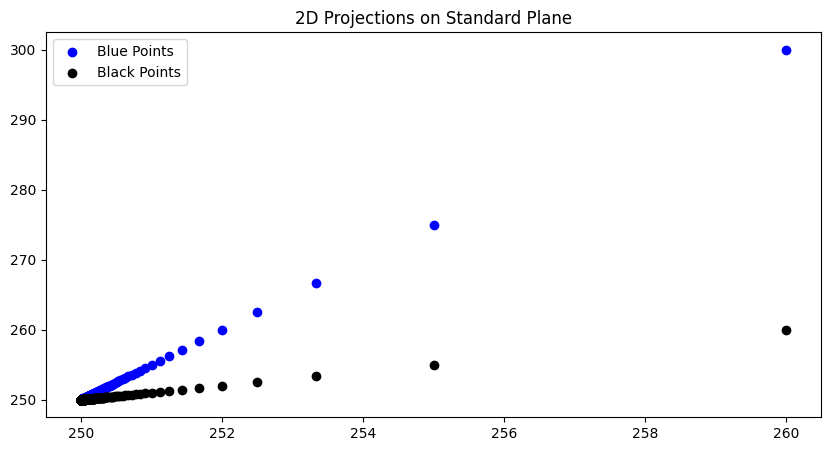

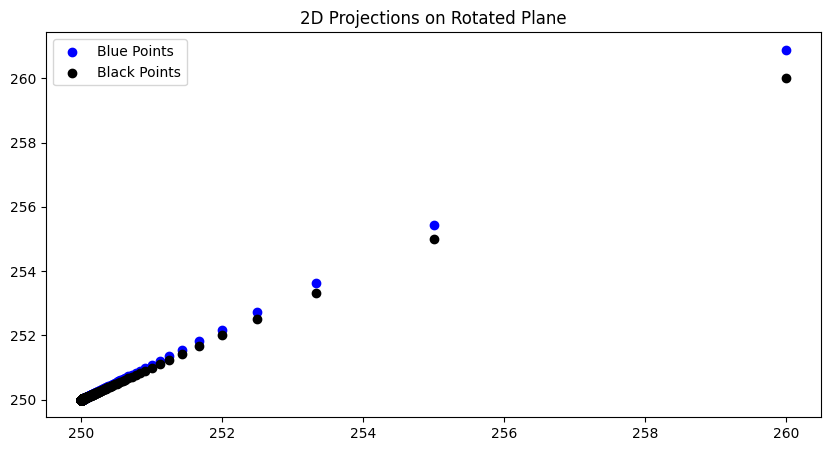

In [26]:
# Step 4 - Map to 2D Image Coordinates
# Map the intersection point based on principal point (image center) (cx, cy) in the image plane
#principal_point = np.array([250, 250])

# To map, u and v is needed, Ox = Oy = 0 and sx and sy is 1 as stated in the homework doc
# u = sx(Ix - Ox) + cx = 1(Ix - 0) + cx = Ix + cx
# v = sy(Iy - Oy) + cy = 1(Iy - 0) + cy = Iy + cy

def u_values(projected_points):
    x_coordinates = projected_points[:, 0] - 0
    cx = 250  # This is the principal point that represents a 500 by 500 image [250,250]
    sx = 1 # pixel scaling factor
    return (sx * x_coordinates) + cx # coordinates are multiplied to scale

def v_values(projected_points):
    y_coordinates = projected_points[:, 1] - 0
    sy = 1 # pixel scaling factor
    cy = 250  # This is the principal point that represents a 500 by 500 image [250,250]
    return (sy * y_coordinates) + cy

# get mapped values
# For constant
mapped_blue_constant = np.column_stack((u_values(projected_blue_constant), v_values(projected_blue_constant)))
mapped_black_constant = np.column_stack((u_values(projected_black_constant), v_values(projected_black_constant)))

# Plot the 2D projections for all points
# For constant
plt.figure(figsize=(10, 5))
plt.scatter(mapped_blue_constant[:, 0], mapped_blue_constant[:, 1], c='blue', label='Blue Points')
plt.scatter(mapped_black_constant[:, 0], mapped_black_constant[:, 1], c='black', label='Black Points')
plt.title('2D Projections on Standard Plane')
plt.legend()
plt.show()

# For rotated
mapped_blue_rotated = np.column_stack((u_values(projected_blue_rotated), v_values(projected_blue_rotated)))
mapped_black_rotated = np.column_stack((u_values(projected_black_rotated), v_values(projected_black_rotated)))

# Plot the 2D projections for all points
# For rotated
plt.figure(figsize=(10, 5))
plt.scatter(mapped_blue_rotated[:, 0], mapped_blue_rotated[:, 1], c='blue', label='Blue Points')
plt.scatter(mapped_black_rotated[:, 0], mapped_black_rotated[:, 1], c='black', label='Black Points')
plt.title('2D Projections on Rotated Plane')
plt.legend()
plt.show()


## TODO Convert those projects to an image take note of the scale for simplicity
#you can downsample to an image of 500 by 500




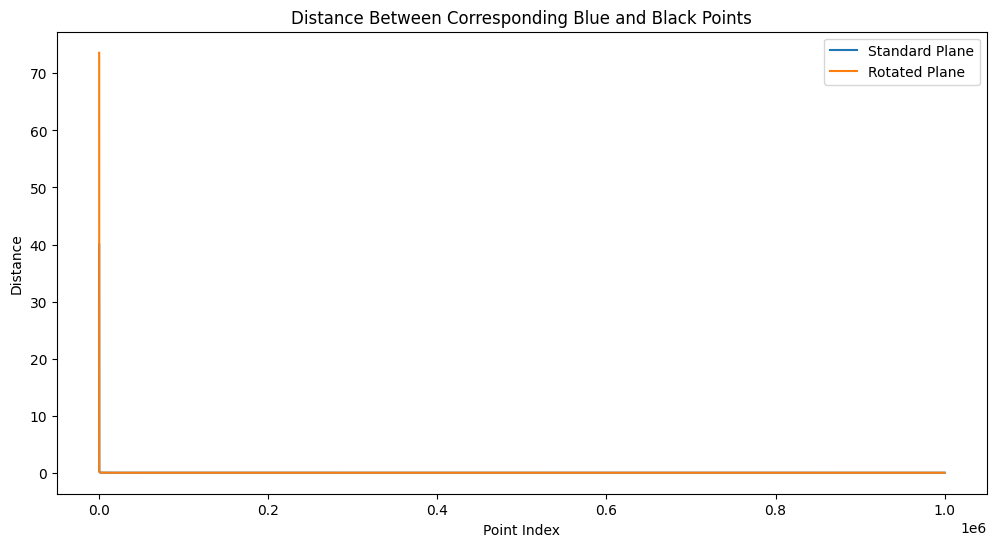

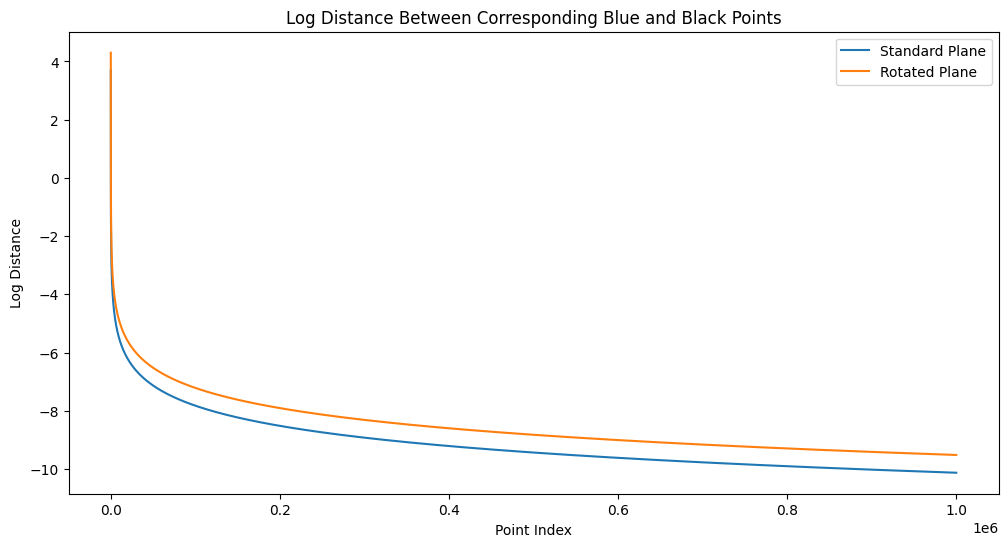

In [30]:
## TODO calculate the distance between each corresponding pair of blue and black  point after projection

# Calculate the distance between each corresponding pair of blue and black points after projection
# For constant plane
distances_constant = np.linalg.norm(mapped_blue_constant - mapped_black_constant, axis=1)

# For rotated plane
distances_rotated = np.linalg.norm(mapped_blue_rotated - mapped_black_rotated, axis=1)

# Plot the distances
plt.figure(figsize=(12, 6))
plt.plot(distances_constant, label='Standard Plane')
plt.plot(distances_rotated, label='Rotated Plane')
plt.title('Distance Between Corresponding Blue and Black Points')
plt.xlabel('Point Index')
plt.ylabel('Distance')
plt.legend()
plt.show()

# Plot the log distances
plt.figure(figsize=(12, 6))
plt.plot(np.log(distances_constant + 1e-10), label='Standard Plane')  # Adding a small epsilon to avoid log(0)
plt.plot(np.log(distances_rotated + 1e-10), label='Rotated Plane')
plt.title('Log Distance Between Corresponding Blue and Black Points')
plt.xlabel('Point Index')
plt.ylabel('Log Distance')
plt.legend()
plt.show()

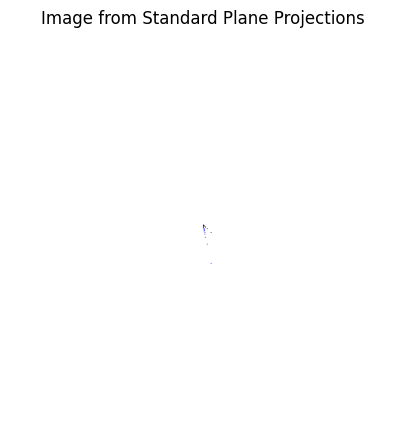

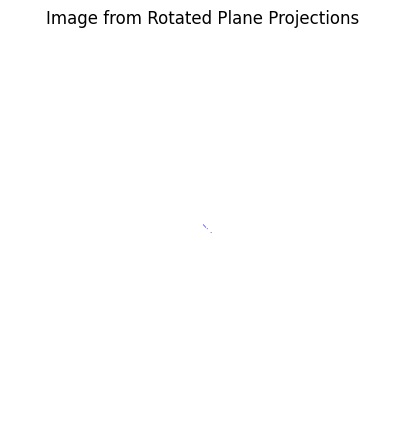

In [31]:
## #TODO plot the image and include in your report

# Plot for Standard Image Plane
# Create an empty image using PIL
image_standard = Image.new('RGB', (500, 500), color='white')

# Plot the projected points for black
for point in mapped_black_constant:
    image_standard.putpixel((int(point[0]), int(point[1])), (0, 0, 0))

# Plot for projected points for blue
for point in mapped_blue_constant:
    image_standard.putpixel((int(point[0]), int(point[1])), (0, 0, 255))

# Display the image
plt.figure(figsize=(10, 5))
plt.title("Image from Standard Plane Projections")
plt.imshow(image_standard)
plt.axis('off')
plt.show()


# Plot for Rotated Image Plane
# Create an empty image using PIL
image_rotated = Image.new('RGB', (500, 500), color='white')

# Plot the projected points for black
for point in mapped_black_rotated:
    image_rotated.putpixel((int(point[0]), int(point[1])), (0, 0, 0))

# Plot for projected points for blue
for point in mapped_blue_rotated:
    image_rotated.putpixel((int(point[0]), int(point[1])), (0, 0, 255))

# Display the image
plt.figure(figsize=(10, 5))
plt.title("Image from Rotated Plane Projections")
plt.imshow(image_rotated)
plt.axis('off')
plt.show()

### PART II Image Demosaicing

Bayer Image with missing pixels


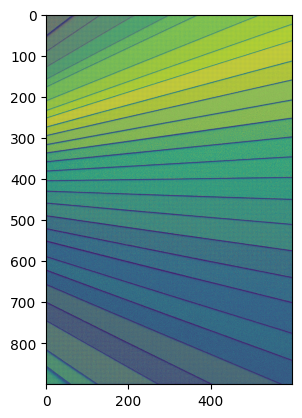

In [44]:
with open('data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
print("Bayer Image with missing pixels")
plt.imshow(loaded_data)

In [53]:
#Complete the function  below to convert bayer to rgb using bilinear interpolation
#RG
#GB
def bayer2rgb(image, height, width):
    # Create an output image (float32 for precision)
    im_color = np.zeros((height, width, 3), dtype=np.float32)

    # Pad the image to handle edge cases, got an error when I did not do this
    padded_image = np.pad(image, 1, mode='edge')

    # For loop to process each pixel
    for y in range(height):
        for x in range(width):
            yp, xp = y + 1, x + 1  # Adjust for padding

            if y % 2 == 0:
                if x % 2 == 0:  # Red pixel
                    im_color[y, x, 0] = padded_image[yp, xp]  # Keeping the red pixel
                    im_color[y, x, 1] = np.mean([padded_image[yp, xp - 1], padded_image[yp, xp + 1],
                                                 padded_image[yp - 1, xp], padded_image[yp + 1, xp]])  # Calculate for the Green
                    im_color[y, x, 2] = np.mean([padded_image[yp - 1, xp - 1], padded_image[yp - 1, xp + 1],
                                                 padded_image[yp + 1, xp - 1], padded_image[yp + 1, xp + 1]])  # Calculate for the Blue

                else:  # As shown in the comment above, move to the green pixel in an R row (RG)
                    im_color[y, x, 0] = np.mean([padded_image[yp, xp - 1], padded_image[yp, xp + 1]])  # Calculate for the Red
                    im_color[y, x, 1] = padded_image[yp, xp]  # Keep green
                    im_color[y, x, 2] = np.mean([padded_image[yp - 1, xp], padded_image[yp + 1, xp]])  # Calculate for the Blue

            else:  # Now for the odd rows
                if x % 2 == 0:  # Next is the green pixel in a B row (GB)
                    im_color[y, x, 0] = np.mean([padded_image[yp - 1, xp], padded_image[yp + 1, xp]])  # Calculate for the Red
                    im_color[y, x, 1] = padded_image[yp, xp]  # Keep green
                    im_color[y, x, 2] = np.mean([padded_image[yp, xp - 1], padded_image[yp, xp + 1]])  # Calculate for the Blue

                else:  # Finally, for the Blue pixel (B)
                    im_color[y, x, 0] = np.mean([padded_image[yp - 1, xp - 1], padded_image[yp - 1, xp + 1],
                                                 padded_image[yp + 1, xp - 1], padded_image[yp + 1, xp + 1]])  # Calculate for the Red
                    im_color[y, x, 1] = np.mean([padded_image[yp, xp - 1], padded_image[yp, xp + 1],
                                                 padded_image[yp - 1, xp], padded_image[yp + 1, xp]])  # Calculate for the Green
                    im_color[y, x, 2] = padded_image[yp, xp]  # Keep blue

    return im_color


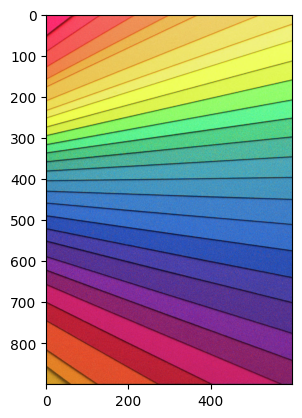

In [54]:
color_data = np.zeros([512,768,3])

color_data = bayer2rgb(loaded_data,loaded_data.shape[0], loaded_data.shape[1])

img1 = Image.fromarray(color_data.astype(np.uint8))
plt.imshow(img1)


Here is the result for your reference in evaluating your performance
![image.png](attachment:image.png)